# 频繁模式与关联规则挖掘
项目地址：https://github.com/AdamFocus/WineReviewMining

使用Wine Reviews数据集

In [1]:
import numpy as np
import pandas as pd

In [30]:
data=pd.read_csv('winemag-data_first150k.csv', index_col=0)

In [12]:
data.shape

(150930, 10)

## 1.处理Wine Review数据集
由于description字段不是标称数据和数值数据，将其删除，并对剩余的字段去重并编号

In [31]:
data.drop(['description'],axis=1,inplace=True)
data.drop_duplicates(inplace=True)
data

,country,designation,points,price,province,region_1,region_2,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...
149635,US,Bungalow Red,84,15.0,California,Santa Barbara County,Central Coast,Syrah-Grenache,Casa Barranca
149636,Portugal,30-year old tawny,84,NaN,Port,NaN,NaN,Port,Casa Santa Eufemia
149637,US,NaN,84,6.0,California,California,California Other,Merlot,Delicato
149638,Argentina,NaN,84,9.0,Mendoza Province,Uco Valley,NaN,Sauvignon Blanc,Finca El Portillo


## 将数值属性points和price进行离散化处理
### points

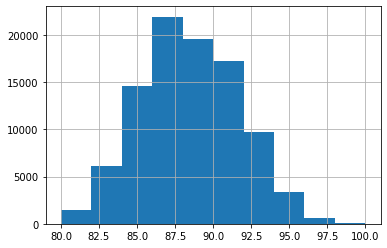

In [15]:
data['points'].hist()

由points图像可以看出，数据集中分布在80-100之间，可以将其分成四部分：
- 80-84 D
- 85-89 C
- 90-94 B
- 95-100 A

In [22]:
def pointMap(x):
    #将分数映射到ABCD
    if x>=95:
        return 'A'
    elif x>=90:
        return 'B'
    elif x >= 85:
        return 'C'
    else:
        return 'D'

In [32]:
data['points']=data['points'].map(pointMap)
data.head(10)

,country,designation,points,price,province,region_1,region_2,variety,winery
0,US,Martha's Vineyard,A,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,A,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,A,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,Reserve,A,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,La Brûlade,A,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,Numanthia,A,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,San Román,A,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Carodorum Único Crianza,A,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,Silice,A,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,Gap's Crown Vineyard,A,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


### price

In [24]:
print('price在0-200之间的比例为',(data.price<200).sum()/data.shape[0])

price在0-200之间的比例为 0.9062411063444045


price主要集中在0-200之间，绘制图像进行更详细的分析

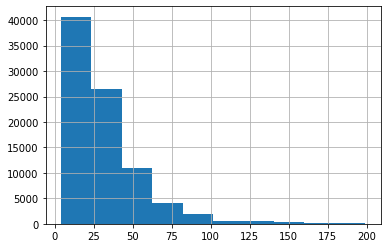

In [25]:
data.loc[data.price<200,'price'].hist()

由图像可以看出，0-25频数最大，随着价格增加频数递减，故可以将price划分成以下几个部分：
- 0-25： e
- 25-60： d
- 60-100： c
- 100-200： b
- 200以上： a

In [28]:
def priceMap(x):
    if x>=200:
        return 'a'
    elif x>=100:
        return 'b'
    elif x>=60:
        return 'c'
    elif x>=25:
        return 'd'
    else:
        return 'e'

In [33]:
data['price']=data['price'].map(priceMap)
data.head(10)

,country,designation,points,price,province,region_1,region_2,variety,winery
0,US,Martha's Vineyard,A,a,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,A,b,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,A,c,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,Reserve,A,c,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,La Brûlade,A,c,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,Numanthia,A,c,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,San Román,A,c,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Carodorum Único Crianza,A,b,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,Silice,A,c,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,Gap's Crown Vineyard,A,c,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [42]:
data

,country,designation,points,price,province,region_1,region_2,variety,winery
0,US,Martha's Vineyard,A,a,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,A,b,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,A,c,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,Reserve,A,c,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,La Brûlade,A,c,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...
149635,US,Bungalow Red,D,e,California,Santa Barbara County,Central Coast,Syrah-Grenache,Casa Barranca
149636,Portugal,30-year old tawny,D,e,Port,NaN,NaN,Port,Casa Santa Eufemia
149637,US,NaN,D,e,California,California,California Other,Merlot,Delicato
149638,Argentina,NaN,D,e,Mendoza Province,Uco Valley,NaN,Sauvignon Blanc,Finca El Portillo


### 将数据转变成list形式，便于进行规则挖掘

In [43]:
newdata=data.values.tolist()

In [45]:
temp=[]
for d in newdata:
    temp.append([v for v in d if isinstance(v,str)])
newdata=temp

#### 将处理好的数据保存起来

In [48]:
import csv
with open('data.csv','w',newline='',encoding='utf-8') as f:
    writer=csv.writer(f)
    for d in newdata:
        writer.writerow(d)

## 2.利用FP-growth方法挖掘出频繁模式
#### FP-growth方法实现于fp_growth_py3.py文件中，该文件见压缩包

In [49]:
import fp_growth_py3 as fpg

设置最小支持度minimum_support

通过调用find_frequent_itemsets函数生成频繁项,函数参数include_support为True时表示返回结果中包含itemset和support



In [58]:
support = 0.1 # 相对支持度
minimum_support = support*len(newdata) # 绝对支持度

frequent_itemsets = fpg.find_frequent_itemsets(newdata, minimum_support=minimum_support, include_support=True)

freq0 = []
for itemset, support in frequent_itemsets:    # 将generator结果存入list
    freq0.append((itemset, support))

freq0 = sorted(freq0, key=lambda i: i[0])   # 排序后输出
print('频繁项集', '绝对支持度', '相对支持度')
for itemset, support in freq0:
    print(str(itemset) + '\t' + str(support) + '\t' + str(round(support/len(newdata), 4)))

频繁项集 绝对支持度 相对支持度
['B']	29243	0.3082
['C']	49441	0.5211
['C', 'California']	13663	0.144
['C', 'US']	18813	0.1983
['C', 'US', 'California']	13663	0.144
['C', 'd']	15802	0.1666
['California']	30031	0.3165
['D']	14365	0.1514
['France']	14041	0.148
['Italy']	14413	0.1519
['US']	39168	0.4129
['US', 'B']	12565	0.1324
['US', 'California']	30031	0.3165
['US', 'd']	19509	0.2056
['US', 'd', 'California']	14290	0.1506
['d']	33700	0.3552
['d', 'B']	14797	0.156
['d', 'California']	14290	0.1506
['e']	51115	0.5388
['e', 'C']	31581	0.3329
['e', 'California']	12217	0.1288
['e', 'D']	11409	0.1203
['e', 'US']	15514	0.1635
['e', 'US', 'California']	12217	0.1288


## 3.利用频繁项集生成关联规则

In [55]:
result=freq0

In [63]:
# 深度优先
def dfs(nums, i, x, supports, rules):
    if i==len(nums):
        # 规则左项
        left = tuple([x[j] for j in range(len(x)) if nums[j]==1])
        # 规则右项
        right = tuple([x[j] for j in range(len(x)) if nums[j]==0])
        
        # 选择大于置信度阈值的规则
        if len(left) > 0 and len(right) > 0 and (left in supports):
            conf = 1.0*supports[x]/supports[left]
            if conf > 0.2:
                rules.append((left, right, supports[x], conf))
        return
    
    for v in [0, 1]:
        nums[i] = v
        dfs(nums, i+1, x, supports, rules)

items = [tuple(result[i][0]) for i in range(len(result))]
supports = {tuple(result[i][0]):1.0*result[i][1]/len(newdata) for i in range(len(result))}

# 由频繁项集生成关联规则
rules0 = []
# 深度优先遍历项集的子集，生成左项和右项
for item in items:
    dfs([0]*len(item), 0, item, supports, rules0)
    
print('规则左项', '==>', '规则右项', '规则支持度', '规则置信度')
for left, right, spt, conf in rules0:
    print(str(left)+'=>'+str(right)+'\t'+str(round(spt, 4))+'\t'+str(round(conf, 4)))

规则左项 ==> 规则右项 规则支持度 规则置信度
('California',)=>('C',)	0.144	0.455
('C',)=>('California',)	0.144	0.2763
('US',)=>('C',)	0.1983	0.4803
('C',)=>('US',)	0.1983	0.3805
('California',)=>('C', 'US')	0.144	0.455
('US',)=>('C', 'California')	0.144	0.3488
('US', 'California')=>('C',)	0.144	0.455
('C',)=>('US', 'California')	0.144	0.2763
('C', 'California')=>('US',)	0.144	1.0
('C', 'US')=>('California',)	0.144	0.7263
('d',)=>('C',)	0.1666	0.4689
('C',)=>('d',)	0.1666	0.3196
('B',)=>('US',)	0.1324	0.4297
('US',)=>('B',)	0.1324	0.3208
('California',)=>('US',)	0.3165	1.0
('US',)=>('California',)	0.3165	0.7667
('d',)=>('US',)	0.2056	0.5789
('US',)=>('d',)	0.2056	0.4981
('California',)=>('US', 'd')	0.1506	0.4758
('d',)=>('US', 'California')	0.1506	0.424
('d', 'California')=>('US',)	0.1506	1.0
('US',)=>('d', 'California')	0.1506	0.3648
('US', 'California')=>('d',)	0.1506	0.4758
('US', 'd')=>('California',)	0.1506	0.7325
('B',)=>('d',)	0.156	0.506
('d',)=>('B',)	0.156	0.4391
('California',)=>('d',)	0.1506	0

## 4.对规则进行评价
### 4.1使用lift指标评估规则

In [67]:
def lift(rule,support):
    rules=[]
    for left, right, spt, conf in rule:
        rules.append((left,right,spt,conf,conf/support[right]))
    return rules
lifts=lift(rules0,supports)

In [73]:
print('关联规则共 {} 条'.format(len(lifts)))
print('依据置信度排序如下：')
print('规则左项', '==>', '规则右项','Lift')
for left, right, spt, conf, lift in lifts:
    print(left, '==>', right,  round(lift, 4))

关联规则共 42 条
依据置信度排序如下：
规则左项 ==> 规则右项 Lift
('California',) ==> ('C',) 0.873
('C',) ==> ('California',) 0.873
('US',) ==> ('C',) 0.9217
('C',) ==> ('US',) 0.9217
('California',) ==> ('C', 'US') 2.2943
('US',) ==> ('C', 'California') 2.4222
('US', 'California') ==> ('C',) 0.873
('C',) ==> ('US', 'California') 0.873
('C', 'California') ==> ('US',) 2.4222
('C', 'US') ==> ('California',) 2.2943
('d',) ==> ('C',) 0.8998
('C',) ==> ('d',) 0.8998
('B',) ==> ('US',) 1.0407
('US',) ==> ('B',) 1.0407
('California',) ==> ('US',) 2.4222
('US',) ==> ('California',) 2.4222
('d',) ==> ('US',) 1.4022
('US',) ==> ('d',) 1.4022
('California',) ==> ('US', 'd') 2.314
('d',) ==> ('US', 'California') 1.3396
('d', 'California') ==> ('US',) 2.4222
('US',) ==> ('d', 'California') 2.4222
('US', 'California') ==> ('d',) 1.3396
('US', 'd') ==> ('California',) 2.314
('B',) ==> ('d',) 1.4245
('d',) ==> ('B',) 1.4245
('California',) ==> ('d',) 1.3396
('d',) ==> ('California',) 1.3396
('C',) ==> ('e',) 1.1856
('e',) ==>

### 4.2使用Jaccard评估规则

In [89]:
def Jaccard(rule,support):
    rules=[]
    for left, right, spt, conf in rule:
        rules.append((left,right,spt,conf,conf*support[left]/(support[left]+support[right]-conf*support[left])))
    return rules
jc=Jaccard(rules0,supports)

In [90]:
print('关联规则共 {} 条'.format(len(jc)))
print('依据置信度排序如下：')
print('规则左项', '==>', '规则右项','Jaccard')
for left, right, spt, conf, Jaccard in jc:
    print(left, '==>', right,  round(Jaccard, 4))

关联规则共 42 条
依据置信度排序如下：
规则左项 ==> 规则右项 Jaccard
('California',) ==> ('C',) 0.2076
('C',) ==> ('California',) 0.2076
('US',) ==> ('C',) 0.2695
('C',) ==> ('US',) 0.2695
('California',) ==> ('C', 'US') 0.3884
('US',) ==> ('C', 'California') 0.3488
('US', 'California') ==> ('C',) 0.2076
('C',) ==> ('US', 'California') 0.2076
('C', 'California') ==> ('US',) 0.3488
('C', 'US') ==> ('California',) 0.3884
('d',) ==> ('C',) 0.2347
('C',) ==> ('d',) 0.2347
('B',) ==> ('US',) 0.225
('US',) ==> ('B',) 0.225
('California',) ==> ('US',) 0.7667
('US',) ==> ('California',) 0.7667
('d',) ==> ('US',) 0.3656
('US',) ==> ('d',) 0.3656
('California',) ==> ('US', 'd') 0.4054
('d',) ==> ('US', 'California') 0.289
('d', 'California') ==> ('US',) 0.3648
('US',) ==> ('d', 'California') 0.3648
('US', 'California') ==> ('d',) 0.289
('US', 'd') ==> ('California',) 0.4054
('B',) ==> ('d',) 0.3073
('d',) ==> ('B',) 0.3073
('California',) ==> ('d',) 0.289
('d',) ==> ('California',) 0.289
('C',) ==> ('e',) 0.4579
('e',) 

## 5.挖掘结果分析与可视化

In [109]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['font.serif'] = ['KaiTi']

### 通过Lift进行评估，在42条关联规则中有28条是正相关，14条是负相关。

In [94]:
pc=0
nc=0
id=0
for left, right, spt, conf, lift in lifts:
    if lift>1:
        pc=pc+1
    elif lift<1:
        nc=nc+1
    else:
        id=id+1
print(pc,nc,id)

28 14 0


### 绘制Jaccard评估结果的直方图，可以看出推导出的关联规则大部分关联度较低，只有少量规则关联度较高

(array([16.,  6.,  6., 10.,  2.,  0.,  0.,  0.,  0.,  2.]),
 array([0.17724035, 0.2361886 , 0.29513685, 0.35408509, 0.41303334,
        0.47198159, 0.53092984, 0.58987809, 0.64882634, 0.70777459,
        0.76672283]),
 <a list of 10 Patch objects>)

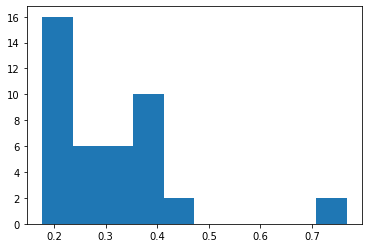

In [99]:
jcResult=[]
for left, right, spt, conf, Jaccard in jc:
    jcResult.append(Jaccard)
plt.hist(jcResult)

### 对获取的频繁项集的支持度绘制图像

In [100]:
x=[]
y=[]
for itemset, support in freq0:
    x.append(support)
    y.append(round(support/len(newdata), 4))   

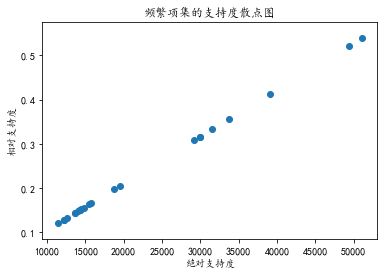

In [111]:
plt.title(u'频繁项集的支持度散点图')
plt.xlabel(u"绝对支持度")
plt.ylabel(u"相对支持度")
plt.scatter(x, y)
plt.show()

### 对生成规则的支持度和置信度进行绘图

In [112]:
x=[]
y=[]
for left, right, spt, conf in rules0:
    x.append(spt)
    y.append(conf)

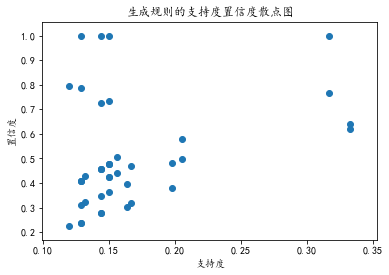

In [113]:
plt.title(u'生成规则的支持度置信度散点图')
plt.xlabel(u"支持度")
plt.ylabel(u"置信度")
plt.scatter(x, y)
plt.show()